In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.metrics import mean_absolute_error

import keras
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

import warnings
warnings.filterwarnings('ignore')

C:\Users\Asus\Anaconda3\envs\AI\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
trainingset_path = '../dataset/training-set.csv'
testingset_path = '../dataset/testing-set.csv'

In [3]:
train_claim_df = pd.read_csv('../dataset/train_claim_df_0912.csv', encoding='utf-8')
test_claim_df = pd.read_csv('../dataset/test_claim_df_0912.csv', encoding='utf-8')
trainingset_df = pd.read_csv(trainingset_path, encoding='utf-8')
testingset_df = pd.read_csv(testingset_path, encoding='utf-8')

In [4]:
# train_0820 = pd.read_csv('../dataset/train_claim_df_0820.csv', encoding='utf-8')
# test_0820 = pd.read_csv('../dataset/test_claim_df_0820.csv', encoding='utf-8')

In [5]:
# train_0820.Insured_Amount = train_claim_df.Insured_Amount
# test_0820.Insured_Amount = test_claim_df.Insured_Amount

In [6]:
train_claim_data = train_claim_df.iloc[:, 2:]
train_label = train_claim_df.iloc[:, 1]

test_claim_data = test_claim_df.iloc[:, 2:]

In [7]:
train_label.shape

(210763,)

In [8]:
test_claim_data.shape

(140510, 90)

In [9]:
all_data = pd.concat([train_claim_data, test_claim_data], axis=0)
all_data.head()

,Cancellation,Manafactured_Year_and_Month,Engine_Displacement_(Cubic_Centimeter),Imported_or_Domestic_Car,qpt,car_steal,car_damage,car_duty,Insured_Amount1,Insured_Amount2,...,Cause_14,Cause_15,Cause_16,Cause_17,Paid_Loss_Amount,paid_Expenses_Amount,Salvage_or_Subrogation?,At_Fault?,Deductible,number_of_claimants
0,1,14.201549,13.852675,0,2.055642,0,0,4,55.775354,60.747979,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,14.196881,13.850963,0,2.055642,2,5,5,61.194559,30.822811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,14.199993,13.493124,0,2.055642,1,4,5,55.837620,52.522424,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,14.201549,14.181278,0,2.440268,2,6,7,68.162585,65.739929,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,14.190647,13.849251,1,2.055642,0,1,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
all_data.shape

(351273, 90)

In [11]:
ss_x = StandardScaler()
ss_x.fit(all_data)
x_train = ss_x.transform(train_claim_data)
test = ss_x.transform(test_claim_data)

In [12]:
from scipy.special import boxcox1p, inv_boxcox1p
lam = 0.15
cox_train = boxcox1p(train_label, lam)

In [14]:
ss_y = StandardScaler()
ss_y.fit(cox_train.reshape(-1, 1))
y_train = ss_y.transform(cox_train.reshape(-1, 1))

In [15]:
x_train, x_ensem, y_train, y_ensem = train_test_split(x_train, y_train, test_size=0.2, random_state=7, shuffle=True)

In [16]:
def MAE(estimator, x, y, cv=5, n_jobs=4):
    cv_results = cross_val_score(estimator, x, y, cv=cv, scoring='neg_mean_absolute_error', n_jobs=n_jobs, verbose=1)
    return (-cv_results).mean()

### regression

In [17]:
lassocv = LassoCV() 
ridge = Ridge() 
lassolarscv = LassoLarsCV()
elasticnetcv = ElasticNetCV()

In [18]:
MAE(lassocv, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   59.2s finished


0.6370813916373851

In [19]:
MAE(ridge, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.7s finished


0.6358917572516065

In [20]:
MAE(lassolarscv, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    8.7s finished


0.6497453576768745

In [21]:
MAE(elasticnetcv, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  1.1min finished


0.6373078746895647

In [22]:
lassocv.fit(x_train,y_train)
ridge.fit(x_train,y_train)
lassolarscv.fit(x_train,y_train)
elasticnetcv.fit(x_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
       l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=1,
       normalize=False, positive=False, precompute='auto',
       random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [23]:
features = train_claim_data.columns

In [24]:
lassocv_coef = lassocv.coef_
ridge_coef = ridge.coef_
lassolarscv_coef = lassolarscv.coef_
elasticnetcv_coef = elasticnetcv.coef_

In [25]:
print("LassoCV regression has conserved %d features over %d"%(len(features[lassocv_coef!=0]),x_train.shape[1]))
print("Ridge regression has conserved %d features over %d"%(len(features[ridge_coef[0]!=0]),x_train.shape[1]))
print("LassoLarsCV regression has conserved %d features over %d"%(len(features[lassolarscv_coef!=0]) ,x_train.shape[1]))
print("ElasticNetCV regression has conserved %d features over %d"%(len(features[elasticnetcv_coef!=0]),x_train.shape[1]))

LassoCV regression has conserved 66 features over 90
Ridge regression has conserved 90 features over 90
LassoLarsCV regression has conserved 31 features over 90
ElasticNetCV regression has conserved 68 features over 90


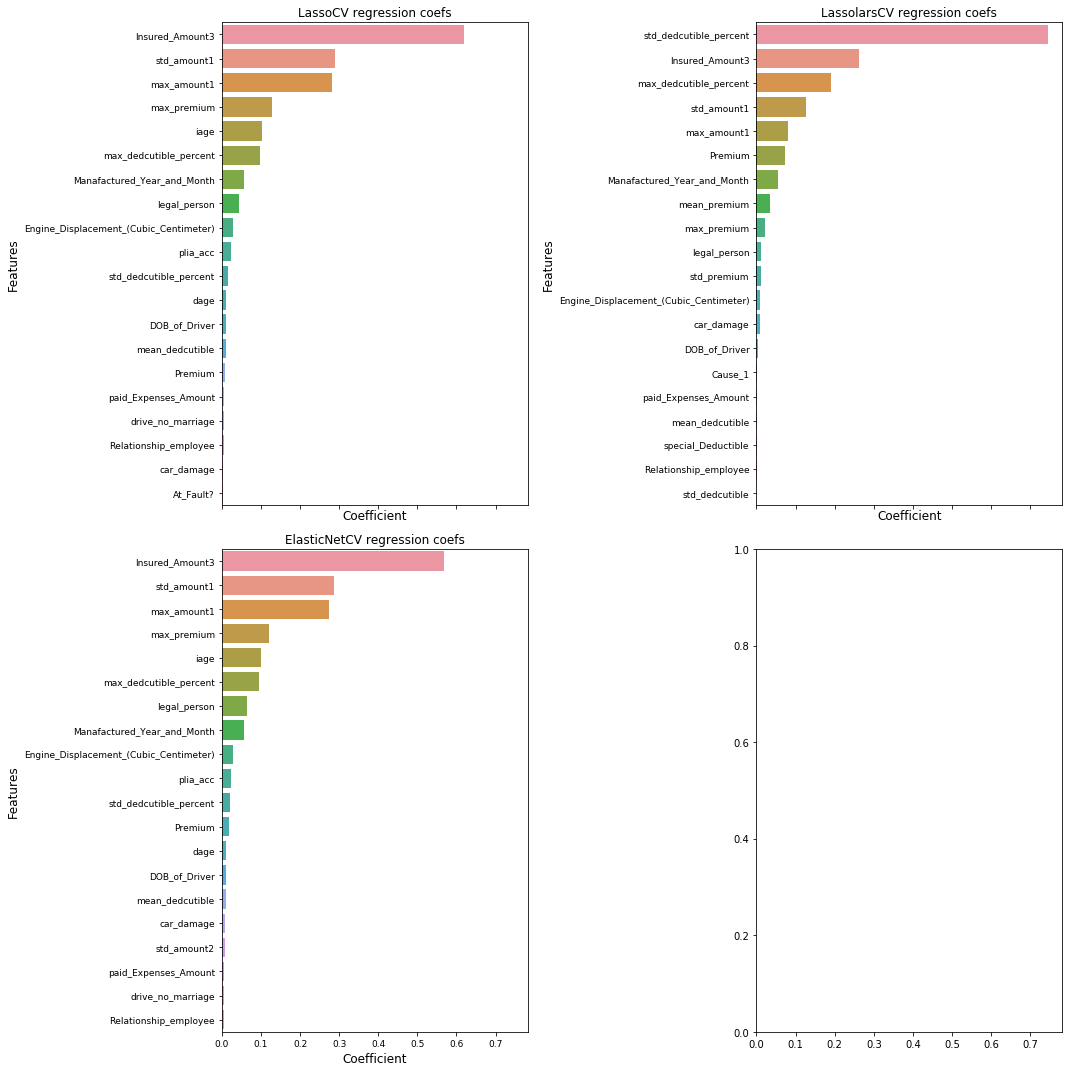

<Figure size 432x288 with 0 Axes>

In [26]:
nrows = ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(15,15))

# names_regressors = [("LassoCV", lassocv, lassocv_coef),("Ridge",ridge, ridge_coef[0]),
#                     ("LassolarsCV",lassolarscv, lassolarscv_coef),("ElasticNetCV",elasticnetcv, elasticnetcv_coef)]
names_regressors = [("LassoCV", lassocv, lassocv_coef),
                    ("LassolarsCV",lassolarscv, lassolarscv_coef),("ElasticNetCV",elasticnetcv, elasticnetcv_coef)]

nregressors = 0
for row in range(nrows):
    for col in range(ncols):
        if nregressors == 3:
            break
        name = names_regressors[nregressors][0]
        regressor = names_regressors[nregressors][1]
        indices = np.argsort(names_regressors[nregressors][2])[::-1][:20]
        g = sns.barplot(y=features[indices][:20],x = names_regressors[nregressors][2][indices] , orient='h',ax=axes[row][col])
        g.set_xlabel("Coefficient",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " regression coefs")
        nregressors += 1
plt.tight_layout()
plt.show()
plt.gcf().clear()

In [167]:
# mae_lassocv = mean_absolute_error(lassocv.predict(x_val), y_val)
# mae_ridge = mean_absolute_error(ridge.predict(x_val), y_val)
# mae_lassolarscv = mean_absolute_error(lassolarscv.predict(x_val), y_val)
# mae_elasticnetcv = mean_absolute_error(elasticnetcv.predict(x_val), y_val)

In [168]:
# print('mae_lassocv: ' + str(mae_lassocv))
# print('mae_ridge: ' + str(mae_ridge))
# print('mae_lassolarscv: ' + str(mae_lassolarscv))
# print('mae_elasticnetcv: ' + str(mae_elasticnetcv))

### tree type model

In [169]:
RF = RandomForestRegressor(n_estimators=1000, max_depth=7, random_state =5)

In [170]:
MAE(RF, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 34.7min finished


0.27814045358735556

In [171]:
RF.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [172]:
xgb_param = {
    'n_estimators': 2402,
    'learning_rate': 0.01,
    'objective': 'reg:linear',
    'subsample': 0.9,#checked
    'colsample_bytree': 0.9,#checked
    'min_child_weight': 1,#checked
    'max_depth': 9,#checked
    'gamma': 0.0,#checked  
    'scale_pos_weight': 1,
    'reg_alpha': 0.01,
    'reg_lambda': 0.1,
}
xgb_model = XGBRegressor(**xgb_param)

In [173]:
MAE(xgb_model, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 48.0min finished


0.2733412585221072

In [174]:
print('Training...')
xgb_model.fit(x_train, y_train)

Training...


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.9, gamma=0.0, learning_rate=0.01,
       max_delta_step=0, max_depth=9, min_child_weight=1, missing=None,
       n_estimators=2402, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0.01, reg_lambda=0.1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

In [175]:
GBoost = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.01,
                                   max_depth=10, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [176]:
MAE(GBoost, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed: 26.3min finished


0.2644652529357276

In [177]:
GBoost.fit(x_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='huber', max_depth=10,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=15, min_samples_split=10,
             min_weight_fraction_leaf=0.0, n_estimators=1000,
             presort='auto', random_state=5, subsample=1.0, verbose=0,
             warm_start=False)

In [27]:
LightGB = lgb.LGBMRegressor(objective='regression_l1',num_leaves=80, min_child_samples=22, min_child_weight=0.001, 
                                   bagging_fraction=0.6, feature_fraction=0.9, 
                                   learning_rate=0.01, n_estimators=3216, max_depth=10, reg_alpha=0.3, reg_lambda=0.08,
                                   metric='mae',subsample=0.8, colsample_bytree=0.8, )

In [28]:
MAE(LightGB, x_train, y_train)

[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  7.8min finished


0.43663411317244877

In [29]:
LightGB.fit(x_train,y_train)
# mae_LightGB = mean_absolute_error(LightGB.predict(x_val), y_val)

LGBMRegressor(bagging_fraction=0.6, boosting_type='gbdt', class_weight=None,
       colsample_bytree=0.8, feature_fraction=0.9, learning_rate=0.01,
       max_depth=10, metric='mae', min_child_samples=22,
       min_child_weight=0.001, min_split_gain=0.0, n_estimators=3216,
       n_jobs=-1, num_leaves=80, objective='regression_l1',
       random_state=None, reg_alpha=0.3, reg_lambda=0.08, silent=True,
       subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

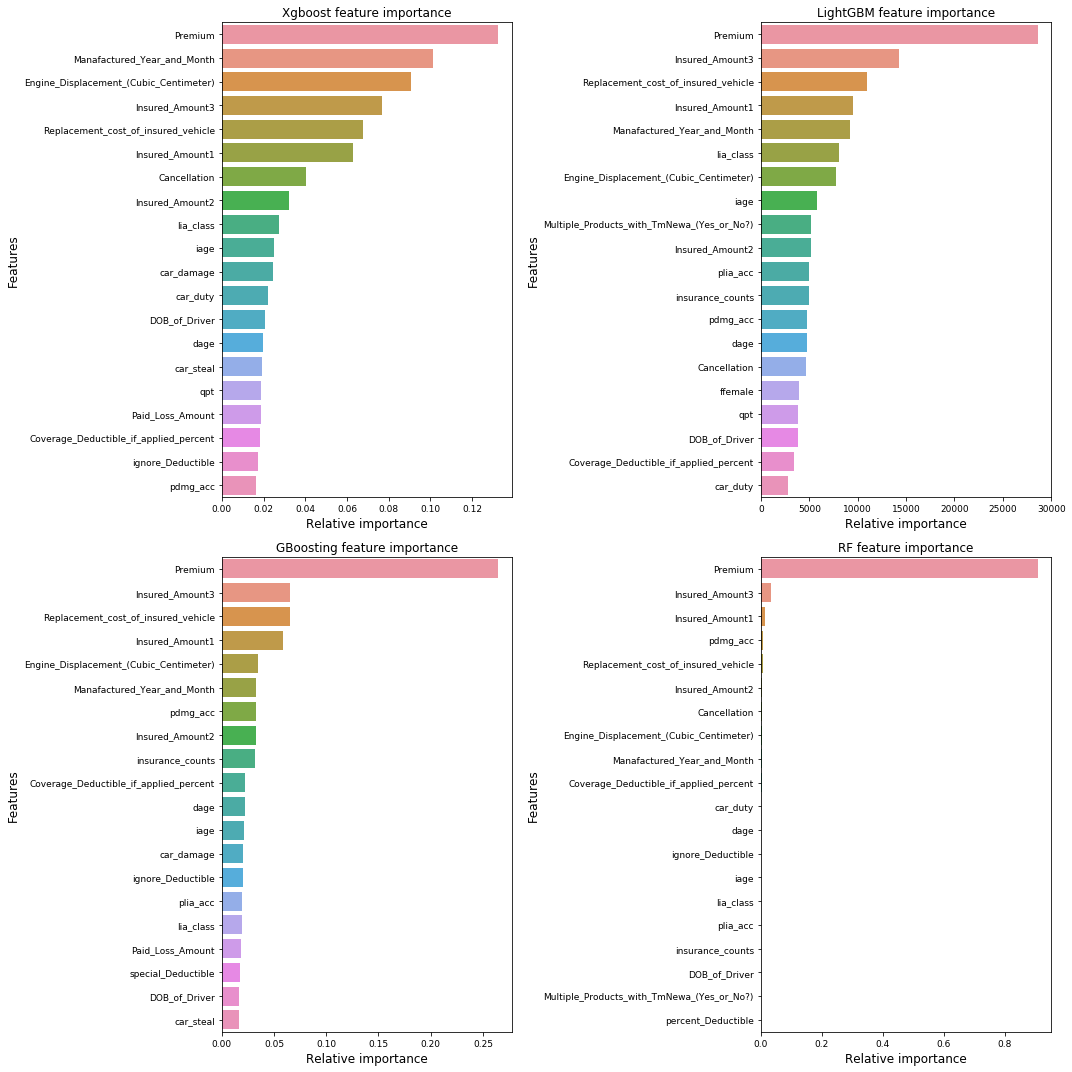

<Figure size 432x288 with 0 Axes>

In [187]:
nrows = 2
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, figsize=(15,15))

names_regressors = [("Xgboost", xgb_model), ("LightGBM",LightGB), ("GBoosting",GBoost), ('RF', RF)]

nregressors = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_regressors[nregressors][0]
        regressor = names_regressors[nregressors][1]
        indices = np.argsort(regressor.feature_importances_)[::-1][:20]
        g = sns.barplot(y=features[indices][:20],x = regressor.feature_importances_[indices][:20] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nregressors += 1

plt.tight_layout()
plt.show()
plt.gcf().clear()

### DNN

In [188]:
import time
#setting the checkpoint dir and checkpoint model name
parent_path = os.path.abspath("..")
save_dir = os.path.join(parent_path, 'checkpoints/')
model_name = time.strftime('%m%d_%H_%M_%S.h5')

In [189]:
x_train_cl, x_val_cl, y_train_cl, y_val_cl = train_test_split(x_train, y_train, test_size=0.2, random_state=7, shuffle=True)
# x_train_po, x_val_po, y_train_po, y_val_po = train_test_split(x_train_po, y_train, test_size=0.2, random_state=7, shuffle=True)

In [192]:
nn_model = Sequential()
# nn_model.add(Dense(100, input_dim=41, kernel_initializer='normal', activation='relu'))
# # nn_model.add(Dense(64, kernel_initializer='normal', activation='relu'))
# nn_model.add(Dense(1, kernel_initializer='normal'))
nn_model.add(Dense(20, input_dim=78, kernel_initializer='normal', activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dense(16, kernel_initializer='normal', activation='relu'))
nn_model.add(BatchNormalization())
nn_model.add(Dense(1, kernel_initializer='normal'))
# Compile model
opt = keras.optimizers.Adam(lr=0.001)
nn_model.compile(loss='mean_absolute_error', optimizer=opt, metrics=['mae'])

In [193]:
# earlystop = EarlyStopping(monitor='val_loss', patience=30, verbose=1)
model_path = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True)
model_history = nn_model.fit(x_train_cl, y_train_cl, validation_data=(x_val_cl, y_val_cl), batch_size=1000, epochs=250, shuffle=True,
                            callbacks=[checkpoint])

Train on 134888 samples, validate on 33722 samples
Epoch 1/250
134888/134888 [==============================] - 8s 59us/step - loss: 0.3645 - mean_absolute_error: 0.3645 - val_loss: 0.3371 - val_mean_absolute_error: 0.3371

Epoch 00001: val_loss improved from inf to 0.33710, saving model to D:\fang\AI_proj\tbrain_policy\checkpoints/0906_16_30_00.h5
Epoch 2/250
134888/134888 [==============================] - 2s 11us/step - loss: 0.2916 - mean_absolute_error: 0.2916 - val_loss: 0.2851 - val_mean_absolute_error: 0.2851

Epoch 00002: val_loss improved from 0.33710 to 0.28512, saving model to D:\fang\AI_proj\tbrain_policy\checkpoints/0906_16_30_00.h5
Epoch 3/250
134888/134888 [==============================] - 1s 11us/step - loss: 0.2774 - mean_absolute_error: 0.2774 - val_loss: 0.2763 - val_mean_absolute_error: 0.2763

Epoch 00003: val_loss improved from 0.28512 to 0.27632, saving model to D:\fang\AI_proj\tbrain_policy\checkpoints/0906_16_30_00.h5
Epoch 4/250
134888/134888 [==============

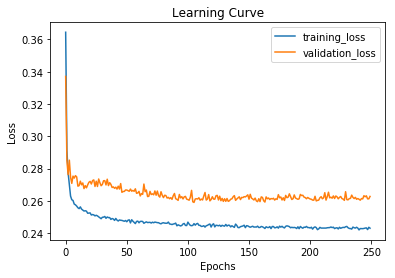

In [194]:
training_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

plt.plot(training_loss, label="training_loss")
plt.plot(val_loss, label="validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Learning Curve")
plt.legend(loc='best')
plt.show()

In [195]:
from keras.models import load_model
best_nn_model = load_model('../checkpoints/0906_16_30_00.h5')

In [30]:
# y_pred_nn_best = ss_y.inverse_transform(best_nn_model.predict(x_ensem))
y_pred_lassocv = ss_y.inverse_transform(lassocv.predict(x_ensem))
y_pred_ridge = ss_y.inverse_transform(ridge.predict(x_ensem))
y_pred_lassolarscv = ss_y.inverse_transform(lassolarscv.predict(x_ensem))
y_pred_elasticnetcv = ss_y.inverse_transform(elasticnetcv.predict(x_ensem))
# y_pred_RF = ss_y.inverse_transform(RF.predict(x_ensem))
# y_pred_xgb = ss_y.inverse_transform(xgb_model.predict(x_ensem))
# y_pred_GBoost = ss_y.inverse_transform(GBoost.predict(x_ensem))
y_pred_LightGB = ss_y.inverse_transform(LightGB.predict(x_ensem))

In [197]:
y_pred_nn_best.shape

(42153, 1)

In [35]:
y_pred_lassocv = inv_boxcox1p(ss_y.inverse_transform(lassocv.predict(x_ensem)), lam)
y_pred_ridge = inv_boxcox1p(ss_y.inverse_transform(ridge.predict(x_ensem)), lam)
y_pred_lassolarscv = inv_boxcox1p(ss_y.inverse_transform(lassolarscv.predict(x_ensem)), lam)
y_pred_elasticnetcv = inv_boxcox1p(ss_y.inverse_transform(elasticnetcv.predict(x_ensem)), lam)
y_pred_LightGB = inv_boxcox1p(ss_y.inverse_transform(LightGB.predict(x_ensem)), lam)

In [37]:
# nn_mae = mean_absolute_error(y_pred_nn_best, ss_y.inverse_transform(y_ensem))
# lassocv_mae = mean_absolute_error(y_pred_lassocv, inv_boxcox1p(ss_y.inverse_transform(y_ensem), lam))
# ridge_mae = mean_absolute_error(y_pred_ridge, inv_boxcox1p(ss_y.inverse_transform(y_ensem), lam))
# lassolarscv_mae = mean_absolute_error(y_pred_lassolarscv, inv_boxcox1p(ss_y.inverse_transform(y_ensem), lam))
# elasticnetcv_mae = mean_absolute_error(y_pred_elasticnetcv, inv_boxcox1p(ss_y.inverse_transform(y_ensem), lam))
# RF_mae = mean_absolute_error(y_pred_RF, ss_y.inverse_transform(y_ensem))
# xgb_mae = mean_absolute_error(y_pred_xgb, ss_y.inverse_transform(y_ensem))
# GBoost_mae = mean_absolute_error(y_pred_GBoost, ss_y.inverse_transform(y_ensem))
LightGB_mae = mean_absolute_error(y_pred_LightGB, inv_boxcox1p(ss_y.inverse_transform(y_ensem), lam))

In [38]:
# print(nn_mae)
# print(lassocv_mae)
# print(ridge_mae)
# print(lassolarscv_mae)
# print(elasticnetcv_mae)
# print(RF_mae)
# print(xgb_mae)
# print(GBoost_mae)
print(LightGB_mae)

1720.9396002264416


In [96]:
print(nn_mae)
print(lassocv_mae)
print(ridge_mae)
print(lassolarscv_mae)
print(elasticnetcv_mae)
print(RF_mae)
print(xgb_mae)
print(GBoost_mae)
print(LightGB_mae)

1758.8965829328833
2221.1157004603174
2221.9366360449535
2221.799758072731
2221.4018251572406
1955.2883733944363
1945.0501246189847
1727.2363771008695


### ensmble

In [97]:
ensemble_df = pd.DataFrame({'lassocv':y_pred_lassocv, 'ridge':y_pred_ridge.reshape(-1),
                           'lassolarscv':y_pred_lassolarscv, 'elasticnetcv':y_pred_elasticnetcv, 'xgb':y_pred_xgb, 
                           'GBoost':y_pred_GBoost, 'LightGB':y_pred_LightGB, 'dnn':y_pred_nn_best.reshape(-1)})

In [98]:
ensemble_df = ensemble_df[['lassocv', 'ridge', 'lassolarscv', 'elasticnetcv', 'xgb', 'GBoost', 'LightGB', 'dnn']]

In [ ]:
# ensemble_df.iloc[ensemble_df[ensemble_df['result'] < 0].index, -1] = 0

In [ ]:
# ensemble_df.iloc[ensemble_df[ensemble_df['dnn'] < 0].index, 8] = 0

In [ ]:
# ensemble_df['maen'] = (ensemble_df['lassocv'] + ensemble_df['ridge'] + ensemble_df['lassolarscv'] + ensemble_df['elasticnetcv'] + ensemble_df['xgb'] + ensemble_df['GBoost'] + ensemble_df['LightGB'] + ensemble_df['dnn']) / 8

In [39]:
# y_nn = ss_y.inverse_transform(best_nn_model.predict(test))
# y_lassocv = ss_y.inverse_transform(lassocv.predict(test))
# y_ridge = ss_y.inverse_transform(ridge.predict(test))
# y_lassolarscv = ss_y.inverse_transform(lassolarscv.predict(test))
# y_elasticnetcv = ss_y.inverse_transform(elasticnetcv.predict(test))
# y_RF = ss_y.inverse_transform(RF.predict(test))
# y_xgb = ss_y.inverse_transform(xgb_model.predict(test))
# y_GBoost = ss_y.inverse_transform(GBoost.predict(test))
y_LightGB = ss_y.inverse_transform(LightGB.predict(test))

In [40]:
y_LightGB = inv_boxcox1p(y_LightGB, lam)

In [42]:
y_LightGB[7]

0.0007158931464940282

In [201]:
test_ensem_df = pd.DataFrame({'lassocv':y_lassocv, 'ridge':y_ridge.reshape(-1),
                           'lassolarscv':y_lassolarscv, 'elasticnetcv':y_elasticnetcv,
                              'RF':y_RF, 'xgb':y_xgb, 
                           'GBoost':y_GBoost, 'LightGB':y_LightGB, 'dnn':y_nn.reshape(-1)})

In [202]:
test_ensem_df = test_ensem_df[['lassocv', 'ridge', 'lassolarscv', 'elasticnetcv','RF', 'xgb', 'GBoost', 'LightGB', 'dnn']]

In [203]:
test_ensem_df

,lassocv,ridge,lassolarscv,elasticnetcv,RF,xgb,GBoost,LightGB,dnn
0,3531.667618,3513.489200,3531.840826,3534.351792,2833.732536,3013.420898,3291.751855,3345.705651,3293.606689
1,818.389399,809.127565,817.831109,817.687372,1736.496291,1445.992188,1276.302068,1825.247833,1718.731934
2,2382.814557,2271.731998,2385.830877,2386.147712,2649.787523,2204.367432,2472.510028,3090.618737,2946.410645
3,5963.928844,5928.393389,5966.488320,5968.001797,5985.867358,5837.438965,6476.006553,6107.234159,6145.209961
4,2826.166149,2842.003233,2826.011714,2826.310676,2782.799134,2792.700439,2701.583471,3210.162757,3083.473877
5,9148.240864,9148.239818,9149.444198,9153.602828,8663.425026,8821.465820,9212.564068,9567.385732,9676.754883
6,18565.451803,18632.600067,18563.946979,18553.146930,19491.133116,22321.062500,22993.179765,21884.805256,21438.007812
7,1251.266440,1344.107972,1249.822774,1249.957167,0.123279,62.028328,76.871529,-1.805535,228.807144
8,3546.167638,3581.159025,3544.828725,3551.373003,3701.630489,3696.382812,4197.509385,4060.611661,3915.303955
9,8075.235935,8076.280311,8076.892534,8081.925961,8115.129925,7860.289551,8769.201570,9040.246590,9122.162109


In [ ]:
xgb_reg = xgb.XGBRegressor()

In [ ]:
xgb_reg.fit(ensemble_df, ss_y.inverse_transform(y_ensem))

In [ ]:
y_xgb_ensemble = xgb_reg.predict(test_ensem_df)

In [ ]:
y_xgb_ensemble

# super ensemble

In [ ]:
m_1603 = pd.read_csv('../result_csv/16/nn_810_1603.csv', encoding='utf-8')
m_1604 = pd.read_csv('../result_csv/16/nn_810_1604.csv', encoding='utf-8')
m_1611 = pd.read_csv('../result_csv/16/nn_0809_1611.csv', encoding='utf-8')
m_1625 = pd.read_csv('../result_csv/16/nn_imp_813_1625.csv', encoding='utf-8')
m_1644 = pd.read_csv('../result_csv/16/y_pred_nn_0808_1644.csv', encoding='utf-8')
m_1653 = pd.read_csv('../result_csv/16/two_813_1653.csv', encoding='utf-8')
m_1670 = pd.read_csv('../result_csv/16/nn_new_814_1670.csv', encoding='utf-8')
m_1688 = pd.read_csv('../result_csv/16/best_y_pred_nn_0807_1688.csv', encoding='utf-8')
m_1695 = pd.read_csv('../result_csv/16/nn_815_1695.csv', encoding='utf-8')

In [ ]:
model_16 = pd.DataFrame({1603:m_1603.Next_Premium, 1604:m_1604.Next_Premium, 1611:m_1611.Next_Premium, 1625:m_1625.Next_Premium,
                        1644:m_1644.Next_Premium, 1653:m_1653.Next_Premium, 1670:m_1670.Next_Premium, 1688:m_1688.Next_Premium,
                        1695:m_1695.Next_Premium})

In [ ]:
model_16['weight'] = model_16[1603] * 0.2 + model_16[1604] * 0.18 + model_16[1611] * 0.17 + model_16[1625] * 0.13 + model_16[1644] * 0.11 + model_16[1653] * 0.09 + model_16[1670] * 0.06 + model_16[1688] * 0.04 + model_16[1695] * 0.02

In [ ]:
model_16

In [204]:
#result to csv
submit = testingset_df.copy()
submit['Next_Premium'] = test_ensem_df.LightGB
submit.iloc[submit[submit['Next_Premium'] < 0].index, 1] = 0
submit.to_csv('../result_csv/lgb_78_0906.csv', sep=',', index=None)

In [65]:
#result to csv
submit = testingset_df.copy()
submit['Next_Premium'] = y_LightGB
submit.iloc[submit[submit['Next_Premium'] < 0].index, 1] = 0
submit.to_csv('../result_csv/lgb_boxcoxfory_913.csv', sep=',', index=None)

In [53]:
y_LightGB = y_LightGB.astype(int)

In [63]:
y_LightGB[136363] = 0

In [64]:
y_LightGB.min()

0